In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error,r2_score

In [2]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB


In [4]:
lbl_make = LabelEncoder()
lbl_model = LabelEncoder()
lbl_vehicleclass = LabelEncoder()
lbl_transmission = LabelEncoder()
lbl_fueltype = LabelEncoder()

df['lbl_make'] = lbl_make.fit_transform(df['MAKE'])
df['lbl_model'] = lbl_model.fit_transform(df['MODEL'])
df['lbl_vehicleclass'] = lbl_vehicleclass.fit_transform(df['VEHICLECLASS'])
df['lbl_transmission'] = lbl_transmission.fit_transform(df['TRANSMISSION'])
df['lbl_fueltype'] = lbl_fueltype.fit_transform(df['FUELTYPE'])

df = df.drop(['MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE'],axis = 1)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
lbl_make                    1067 non-null int32
lbl_model                   1067 non-null int32
lbl_vehicleclass            1067 non-null int32
lbl_transmission            1067 non-null int32
lbl_fueltype                1067 non-null int32
dtypes: float64(4), int32(5), int64(4)
memory usage: 87.6 KB


In [6]:
df.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,lbl_make,lbl_model,lbl_vehicleclass,lbl_transmission,lbl_fueltype
0,2014,2.0,4,9.9,6.7,8.5,33,196,0,329,0,10,3
1,2014,2.4,4,11.2,7.7,9.6,29,221,0,329,0,20,3
2,2014,1.5,4,6.0,5.8,5.9,48,136,0,330,0,17,3
3,2014,3.5,6,12.7,9.1,11.1,25,255,0,389,11,11,3
4,2014,3.5,6,12.1,8.7,10.6,27,244,0,483,11,11,3


# Visualize the model

In [7]:
corelation_df = df.corr()
corelation_df

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,lbl_make,lbl_model,lbl_vehicleclass,lbl_transmission,lbl_fueltype
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154,-0.166416,0.096304,0.240529,-0.272427,0.060869
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685,-0.203427,0.080010,0.208528,-0.246456,0.127959
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039,-0.246247,0.147394,0.354363,-0.350241,-0.128841
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748,-0.174665,0.182009,0.430074,-0.348174,-0.178439
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129,-0.222273,0.161373,0.384678,-0.352596,-0.148167
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394,0.226347,-0.148806,-0.354073,0.341119,0.007106
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000,-0.186504,0.155492,0.388468,-0.299393,0.075167
lbl_make,NaN,-0.166416,-0.203427,-0.246247,-0.174665,-0.222273,0.226347,-0.186504,1.000000,0.039068,0.005853,0.193264,0.015051
lbl_model,NaN,0.096304,0.080010,0.147394,0.182009,0.161373,-0.148806,0.155492,0.039068,1.000000,0.244648,-0.002004,-0.051902


[]

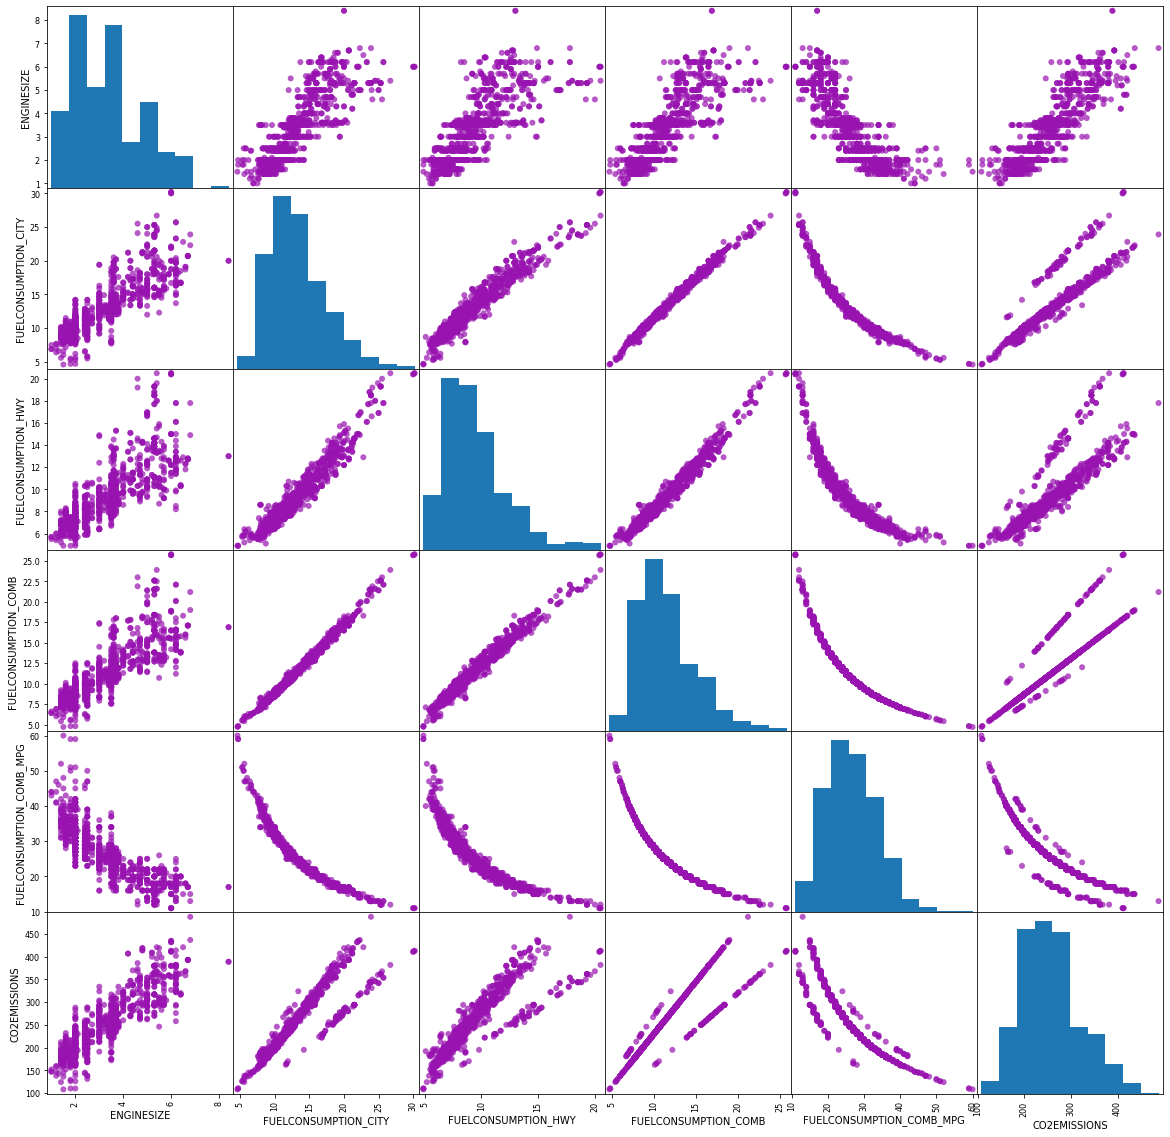

In [8]:
pd.plotting.scatter_matrix(df.drop(['MODELYEAR','lbl_make','lbl_model','lbl_fueltype','lbl_vehicleclass','lbl_transmission','CYLINDERS'],axis = 1),alpha = 0.7,figsize = (20,20)
                           ,marker = 'o',color = '#9813b0')
plt.plot()
                           
                           

In [9]:
feature = df.drop(['CO2EMISSIONS','lbl_make','lbl_model','lbl_vehicleclass','MODELYEAR','lbl_fueltype'],axis = 1)
target= df['CO2EMISSIONS']

# build the model

In [11]:
x_train, x_test, y_train, y_test = train_test_split(feature,target, test_size = 0.2,random_state = 42)
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [15]:
print("coeficient :",regr.coef_)
print("intercept :",regr.intercept_)

coeficient : [  8.97131991   7.20771416 -13.67248358  -6.00656783  23.14922545
  -4.04409933   0.12420376]
intercept : 260.9161916184553


# Accuracy of the model

In [32]:
print(f"Mean Absolute Error : {np.mean(np.absolute(y_pred-y_test))}")
print(f"\n Residual Sum of Square(MSE) : {np.mean(y_pred-y_test)**2}")
print(f"\n R2 Score : {r2_score(y_pred, y_test)}")

Mean Absolute Error : 12.912567613917151

 Residual Sum of Square(MSE) : 0.39730914346048274

 R2 Score : 0.8943586307022385
